In [9]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn import metrics
%matplotlib inline

In [10]:
listing = pd.read_csv("listing_processed.csv", header=0)

In [11]:
listing.shape 

(50196, 22)

(array([24635.,  1180.,  1304.,  1386.,  2511.,  2091.,  2115.,  2755.,
         2297., 10376.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

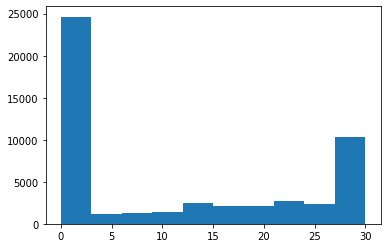

In [6]:
plt.hist(listing.availability_30)

In [7]:
listing.columns

Index(['id', 'host_id', 'host_since', 'neighbourhood_cleansed', 'zipcode',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'availability_30', 'number_of_reviews',
       'cancellation_policy', 'review_cat', 'host_months', 'property_cat'],
      dtype='object')

In [ ]:
# cleaned format (NY 10044 | 11385-2308), drop rows if zipcord doesnt belong to nyc
# (50650, 22) -> (50196, 22) 
# now we have 190 unique zipcode


In [23]:
ava_temp = listing.groupby(['zipcode','bedrooms','beds'],as_index=False)['availability_30'].mean()
ava_temp

,zipcode,bedrooms,beds,availability_30
0,10001,0,0,14.538462
1,10001,0,1,14.621622
2,10001,0,2,12.964286
3,10001,0,3,16.750000
4,10001,0,4,23.500000
...,...,...,...,...
2899,11693,5,7,11.000000
2900,11694,1,1,16.200000
2901,11694,2,2,29.000000
2902,11694,2,4,29.000000


In [25]:
ava_temp_2 = listing.groupby(['zipcode'],as_index=False)['availability_30'].mean()
ava_temp_2

,zipcode,availability_30
0,10001,13.961983
1,10002,10.239607
2,10003,9.214286
3,10004,10.507246
4,10005,13.790123
...,...,...
185,11559,21.500000
186,11691,20.810345
187,11692,19.311688
188,11693,17.925926


In [26]:
ava_temp.to_csv('aval_30.csv', index=False)
ava_temp_2.to_csv('aval_30_zip.csv', index=False)

In [88]:
print("price over 2000: ", sum(listing.price > 2000))

price over 2000:  155


In [89]:
# standardize cleaning_fee, number_of_reviews, host_months, extra_people
listing['cleaning_fee'] = preprocessing.scale(listing['cleaning_fee'])
listing['number_of_reviews'] = preprocessing.scale(listing['number_of_reviews'])
listing['host_months'] = preprocessing.scale(listing['host_months'])
listing['extra_people'] = preprocessing.scale(listing['extra_people'])
listing['minimum_nights'] = preprocessing.scale(listing['minimum_nights'])
listing['availability_30'] = preprocessing.scale(listing['availability_30'])

/Users/rainyleon/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/rainyleon/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/rainyleon/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [90]:
# transfer categorical variables
le1 = preprocessing.LabelEncoder()
listing.neighbourhood_cleansed = le1.fit_transform(listing.neighbourhood_cleansed)
le2 = preprocessing.LabelEncoder()
listing.property_cat = le2.fit_transform(listing.property_cat)
le3 = preprocessing.LabelEncoder()
listing.room_type = le3.fit_transform(listing.room_type)
le4 = preprocessing.LabelEncoder()
listing.cancellation_policy = le4.fit_transform(listing.cancellation_policy)
le5 = preprocessing.LabelEncoder()
listing.review_cat = le5.fit_transform(listing.review_cat)

In [7]:
# listing = listing[ listing['price'] < 2000]
# listing = listing[ listing['price'] > 0]

In [91]:
zipcodes = listing.zipcode.copy()

In [92]:
train = listing.shape[0] * 0.75
data_Y = listing['price']
data_X = listing.drop(['Unnamed: 0','id', 'host_id', 'zipcode','host_since', 'price','property_type'], axis=1)

In [94]:
# train change to dummy:property_type，room_type，neighbourhood_cleansed，cancellation_policy，review_cat


dummyCols=pd.get_dummies(data_X['room_type'])
dummyCols.columns = [str(col) + 'room_type' for col in dummyCols.columns]
data_X=data_X.join(dummyCols)
del data_X['room_type']

dummyCols2=pd.get_dummies(data_X['neighbourhood_cleansed'])
dummyCols2.columns = [str(col) + 'neighbourhood_cleansed' for col in dummyCols2.columns]
data_X=data_X.join(dummyCols2)
del data_X['neighbourhood_cleansed']


dummyCols3=pd.get_dummies(data_X['cancellation_policy'])
dummyCols3.columns = [str(col) + 'cancellation_policy' for col in dummyCols3.columns]
data_X=data_X.join(dummyCols3)
del data_X['cancellation_policy']

dummyCols4=pd.get_dummies(data_X['review_cat'])
dummyCols4.columns = [str(col) + 'review_cat' for col in dummyCols4.columns]
data_X=data_X.join(dummyCols4)
del data_X['review_cat']

dummyCols5=pd.get_dummies(data_X['property_cat'])
dummyCols5.columns = [str(col) + 'property_cat' for col in dummyCols5.columns]
data_X=data_X.join(dummyCols5)
del data_X['property_cat']

In [95]:
train_X = data_X[:int(train)]
test_X = data_X[int(train):]
train_y = data_Y[:int(train)]
test_y = data_Y[int(train):]

train_X = train_X[ train_y < 2000]
train_X = train_X[ train_y > 0]
train_y = train_y[ train_y < 2000]
train_y = train_y[ train_y > 0]

test_X = test_X[test_y > 0]
test_y = test_y[test_y > 0]

zipcodes_test = zipcodes[int(train):]
zipcodes_test = zipcodes_test[test_y > 0]

/Users/rainyleon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [96]:
train_X.shape

(37892, 252)

In [97]:
# build model
# Linear Regression model

model_1=LinearRegression()
model_1.fit(train_X,train_y)
y_pred = model_1.predict(test_X)


In [98]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 774599.4787388856
Mean Squared Error: 2546358471074915.5
Root Mean Squared Error: 50461455.30080277


In [99]:
train_X

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,number_of_reviews,...,4cancellation_policy,5cancellation_policy,0review_cat,1review_cat,2review_cat,3review_cat,0property_cat,1property_cat,2property_cat,3property_cat
0,2,1.0,0.0,1.0,0.607369,1,-0.584827,-0.018851,-0.574752,0.468271,...,0,0,0,0,1,0,1,0,0,0
1,3,1.0,1.0,4.0,-0.854957,1,-0.584827,-0.299738,-0.409867,5.888085,...,0,0,1,0,0,0,0,0,1,0
2,2,1.0,1.0,1.0,1.069157,2,3.545211,-0.206109,-0.904522,1.081835,...,0,0,1,0,0,0,1,0,0,0
3,2,1.0,1.0,1.0,-0.624063,1,-0.089223,-0.252924,0.579443,9.099069,...,0,0,1,0,0,0,1,0,0,0
4,1,1.0,1.0,1.0,-0.854957,1,-0.584827,-0.252924,-0.904522,1.899920,...,0,0,0,0,1,0,1,0,0,0
5,3,1.0,1.0,2.0,-0.239240,2,-0.171823,-0.299738,-0.574752,2.779362,...,0,0,0,0,1,0,1,0,0,0
6,2,1.0,1.0,1.0,-0.854957,1,-0.584827,-0.252924,-0.822080,3.842872,...,0,0,0,0,1,0,1,0,0,0
7,2,1.0,1.0,1.0,0.376476,2,0.447682,-0.206109,-0.904522,0.836410,...,0,0,0,0,1,0,1,0,0,0
8,2,1.5,1.0,0.0,0.176368,1,0.323781,-0.159295,1.238983,3.147500,...,0,0,0,0,1,0,0,0,0,1
9,1,1.0,1.0,1.0,0.376476,1,1.067188,-0.252924,1.568754,2.002181,...,0,0,0,0,1,0,1,0,0,0


In [55]:
train_y_log = np.log(train_y+0.000001)
ridge = RidgeCV(alphas=[1e-2, 1e-1, 1]).fit(train_X, train_y_log)
y_pred_ridge = ridge.predict(test_X)

In [56]:
ridge.score(train_X,train_y_log)

0.6610347788445119

In [57]:
ridge.score(test_X, np.log(test_y + 0.000001))

0.5917478434252843

In [58]:
sum(test_y > 2000)

83

In [59]:
y_pred_low = y_pred_ridge[test_y < 2000]
y_test_low = test_y[test_y < 2000]

In [60]:
print('Mean Squared Error:', metrics.mean_squared_error(test_y, np.exp(y_pred_ridge))) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, np.exp(y_pred_ridge))))

Mean Squared Error: 459305.58379601385
Root Mean Squared Error: 677.7208745464565


In [61]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_low, np.exp(y_pred_low))) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_low, np.exp(y_pred_low))))

Mean Squared Error: 16189.332833265333
Root Mean Squared Error: 127.23730912458552


In [0]:
# plt.hist(np.log(train_y+0.0000001),bins = 200)

In [62]:
# train_y_log = np.log(train_y+0.000001)
Lasso = LassoCV(alphas=[1e-2, 1e-1, 1]).fit(train_X, train_y_log)
y_pred_lasso = Lasso.predict(test_X)

/Users/rainyleon/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [63]:
Lasso.score(train_X,train_y_log)

0.5190610726977127

In [64]:
Lasso.score(test_X, np.log(test_y + 0.000001))

0.4496971556546079

In [65]:
print('Mean Squared Error:', metrics.mean_squared_error(test_y[test_y < 2000], np.exp(y_pred_lasso[test_y < 2000]))) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y[test_y < 2000], np.exp(y_pred_lasso[test_y < 2000]))))

Mean Squared Error: 19266.6394178762
Root Mean Squared Error: 138.80432060233645


In [66]:
print(sum(Lasso.coef_!=0))
print(len(Lasso.coef_))
print(len(train_X.columns))

20
253
253


In [67]:
Vars = train_X.columns[Lasso.coef_!=0]

In [68]:
Vars

Index(['Unnamed: 0', 'accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee',
       'extra_people', 'minimum_nights', 'availability_30',
       'number_of_reviews', 'host_months', '0room_type', '2room_type',
       '12neighbourhood_cleansed', '27neighbourhood_cleansed',
       '97neighbourhood_cleansed', '129neighbourhood_cleansed', '0review_cat',
       '3review_cat', '1property_cat', '2property_cat'],
      dtype='object')

In [0]:
# Model 2
# KNN

In [69]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10, metric='euclidean')
knn.fit(train_X[Vars], train_y)
y_pred = knn.predict(test_X[Vars])


In [70]:
#print("Accuracy:", metrics.accuracy_score(test_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y[test_y < 2000], y_pred[test_y < 2000])))

Root Mean Squared Error: 184.899063813201


In [76]:
# Model 3
# PCA

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(train_X)
train_x_pca = pca.transform(train_X)
test_x_pca = pca.transform(test_X)

In [77]:
test_x_pca.shape

(12663, 20)

In [80]:
model_1_pca=LinearRegression()
model_1_pca.fit(train_x_pca,train_y_log)
y_pred_pca = model_1_pca.predict(test_x_pca)

In [83]:
model_1_pca.score(train_x_pca,train_y_log)

0.5112658310352178

In [81]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, np.exp(y_pred_pca)))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, np.exp(y_pred_pca)))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, np.exp(y_pred_pca))))

Mean Absolute Error: 113.72369308983492
Mean Squared Error: 472111.46430226264
Root Mean Squared Error: 687.103677986272


In [ ]:
plt.plot(s)

In [101]:
sales = pd.read_csv("zip_Data.csv")

In [103]:
sales.Price = sales.Price / 36.83

In [104]:
sales

,RegionName,Price
0,10025,30416.146267
1,10023,33043.795819
2,10002,29823.106163
3,11226,17416.978911
4,10467,17416.978911
5,10016,21317.241379
6,11201,26042.474431
7,11235,10589.410806
8,11375,11050.303196
9,10009,23473.418409


In [68]:
len(sales.RegionName.unique())

176

In [69]:
len(set(zipcodes_test))

209

In [106]:
pred_price_by_zip = pd.DataFrame({"zip":zipcodes_test, "lasso_pred_price": np.exp(y_pred_lasso), "ridge_pred_price": np.exp(y_pred_ridge), "knn_pred_price": y_pred})

In [107]:
pred_price_by_zip

,zip,lasso_pred_price,ridge_pred_price,knn_pred_price
37987,10454,195.988387,119.342366,178.815430
37988,10016,228.271837,267.555882,312.465820
37989,11220,58.956774,49.271334,44.864258
37990,11203,191.748204,173.631577,272.821289
37991,10028,155.093004,182.527104,192.964844
37992,11206,147.014236,162.665765,188.779297
37993,10009,204.895237,259.456066,267.955078
37994,11211,158.145878,147.542439,164.164062
37995,11206,161.334390,168.084909,194.145508
37996,11207,68.337345,67.982715,128.209961


In [0]:
# all variables 677.381341
# TODO:
# lasso variable selection
# price prediction tool - what features would be beneficial
# price vs rental(not up to date)
# combine models
# our idea: 